In [1]:
import networkx as nx
import pandas as pd
import seaborn as sns
import numpy as np 
cmap = sns.cm.rocket_r
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G = nx.read_gpickle('../../data/processed/SP_multiGraph_Job_Edu_Level.gpickle')

In [3]:
from collections import defaultdict
people = {}

for i,person in enumerate(G.nodes()):
    people[i] = defaultdict(int)
    people[i]['age'] = G.nodes[person]['age']
    for n in G[person]:
        people[i][G.nodes[n]['age']] += 1


In [4]:
bins = list(range(0,70,5)) + [105]
labels = list(range(0,70,5))

In [5]:
def make_heatmap(people_dict, title, filename):
    df = pd.DataFrame.from_dict(people_dict).T.fillna(0)
    df = df.sort_values(by='age').reset_index(drop=True)
    df['age'] = pd.cut(df.age, bins=bins, labels=labels)
    df = df.set_index(df.age).drop('age', axis=1)
    df.columns = pd.cut(df.columns.to_list(), bins=bins, labels=labels)
    df = df.groupby(df.columns, axis=1).sum()
    df = df.groupby('age').mean()
    df = df.reindex(sorted(df.columns, reverse=True), axis=1).T
    df.rename(columns = {df.columns[-1]: str(df.columns[-1]) + '+'}, inplace=True)
    df.rename(index = {df.index[0]: str(df.index[0]) + '+'}, inplace=True)
    sns.heatmap(df, annot=False, vmin=0, vmax=10, cmap=cmap)
    plt.title(title)
    plt.ylabel('Age of Contact')
    plt.xlabel('Age of Person')
    plt.savefig(f'{filename}.png', dpi=300)

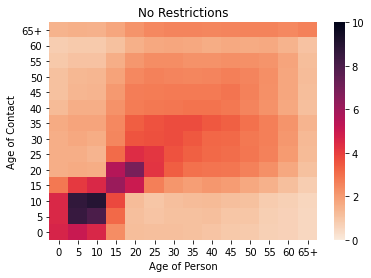

In [6]:
make_heatmap(people, 'No Restrictions', 'heatmap_no_restriction')

In [7]:
people_no_schools = {}

for i,person in enumerate(G.nodes()):
    people_no_schools[i] = defaultdict(int)
    people_no_schools[i]['age'] = G.nodes[person]['age']
    for x,y,values in G.edges(person, data=True):
        if values['edge_type'] != 'school':
            people_no_schools[i][G.nodes[y]['age']] += 1

In [8]:
np.unique([z['edge_type'] for x,y,z in G.edges(data=True)])

array(['home', 'neighbor', 'school', 'work'], dtype='<U8')

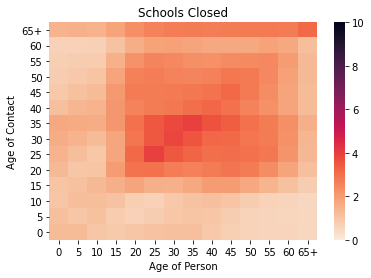

In [9]:
make_heatmap(people_no_schools, 'Schools Closed', 'heatmap_no_schools')

In [10]:
people_no_work = {}

for i,person in enumerate(G.nodes()):
    people_no_work[i] = defaultdict(int)
    people_no_work[i]['age'] = G.nodes[person]['age']
    for x,y,values in G.edges(person, data=True):
        if values['edge_type'] != 'work':
            people_no_work[i][G.nodes[y]['age']] += 1

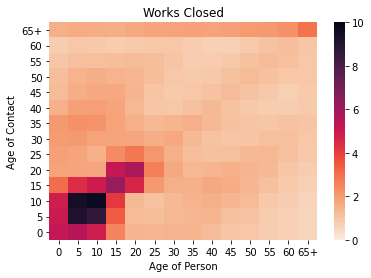

In [11]:
make_heatmap(people_no_work, 'Works Closed', 'heatmap_no_work')

In [70]:
for z in range(1,340):
    l = [(x,y,()) for x,y,v in G.edges(data=True) if v['edge_type'] == 'work' and v['zone'] == z]
    print(len(l))

3633
3630
1489
1359
4351
1759
1824
970
783
706
532


KeyboardInterrupt: 

In [74]:
edges = [(x,y,()) for x,y,v in G.edges(data=True) if v['edge_type'] == 'work' and v['zone'] == 1]
s = nx.MultiGraph(edges)

In [75]:
s.nodes()

NodeView((3, 4, 27, 73, 8188, 10638, 12992, 26700, 38713, 50199, 51544, 21, 29, 30, 69, 70, 72, 230, 11095, 36, 458, 2177, 2389, 2422, 3629, 4325, 4403, 5664, 5841, 5983, 6062, 6541, 6922, 8097, 8617, 12282, 16154, 20364, 21554, 29989, 30368, 30458, 33597, 37191, 37706, 45617, 79, 90, 323, 3281, 3588, 4766, 5723, 8553, 10999, 13103, 28786, 30584, 31671, 32439, 34158, 40886, 46959, 55244, 89, 2540, 3740, 4032, 5354, 5948, 7146, 8989, 9203, 10046, 16563, 20237, 23122, 25525, 27318, 33917, 34076, 35770, 35983, 38691, 40049, 40810, 52813, 53256, 55442, 267, 5019, 5348, 17881, 18060, 30055, 30127, 32462, 36980, 37202, 37640, 41118, 41119, 49466, 288, 503, 1801, 6085, 8071, 14178, 14776, 16074, 22527, 23599, 26259, 30396, 52383, 313, 831, 2350, 2778, 3707, 4172, 4843, 4909, 6175, 10286, 11228, 13432, 17090, 19093, 21653, 23189, 24183, 24823, 24997, 26181, 27136, 28920, 29384, 30131, 33073, 34008, 39093, 40146, 43773, 396, 399, 582, 1797, 1850, 2459, 2759, 3251, 4200, 8039, 8202, 9660, 13567,

In [76]:
nx.write_gml(nx.relabel_nodes(s, lambda x: str(x)), 'subgraph_work.gml')


In [86]:
import json
with open('work_subgraph.json', 'w') as f:
    f.write(json.dumps(nx.cytoscape_data(nx.relabel_nodes(s, lambda x: str(x)))))


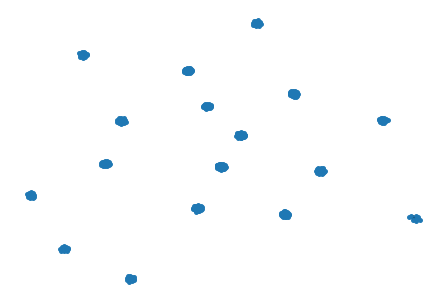

In [79]:
nx.draw(nx.relabel_nodes(s, lambda x: str(x)), node_size=15)